# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Write your code here
print("The foodhub_order data frame has", data.shape[0], "rows and", data.shape[1], "columns.")

The foodhub_order data frame has 1898 rows and 9 columns.


In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


It is interesting that the rating is an object. As it ranges from 1 to 5 it should be an int or a float. It is also interesting that the food preparation time and delivery time are integers as they should be in the date time format.

In [ ]:
# Write your code here
print(data.isnull().sum())
# As of now it looks like there is no error as it returns 0. Let's check the rating column becuase, it should be an int or a float and right now it shows the type to be an object.
print(data['rating'].unique())



order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
['Not given' '5' '3' '4']


#### Observations:

There are no missing values.

In [ ]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


The minimum time it takes for food to be prepared once an order is placed is 20 minutes. The average time it takes for food to be prepared once an order is placed is 27.37 minutes. The maximum time it takes for food to be prepared once an order is placed is 35.00 minutes.

In [ ]:
# Returning are the types of rating in the dataset
print(data['rating'].unique())
# count how many not given values are in the dataset
data['rating'].value_counts()

['Not given' '5' '3' '4']


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


There are 736 order ratings that are not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


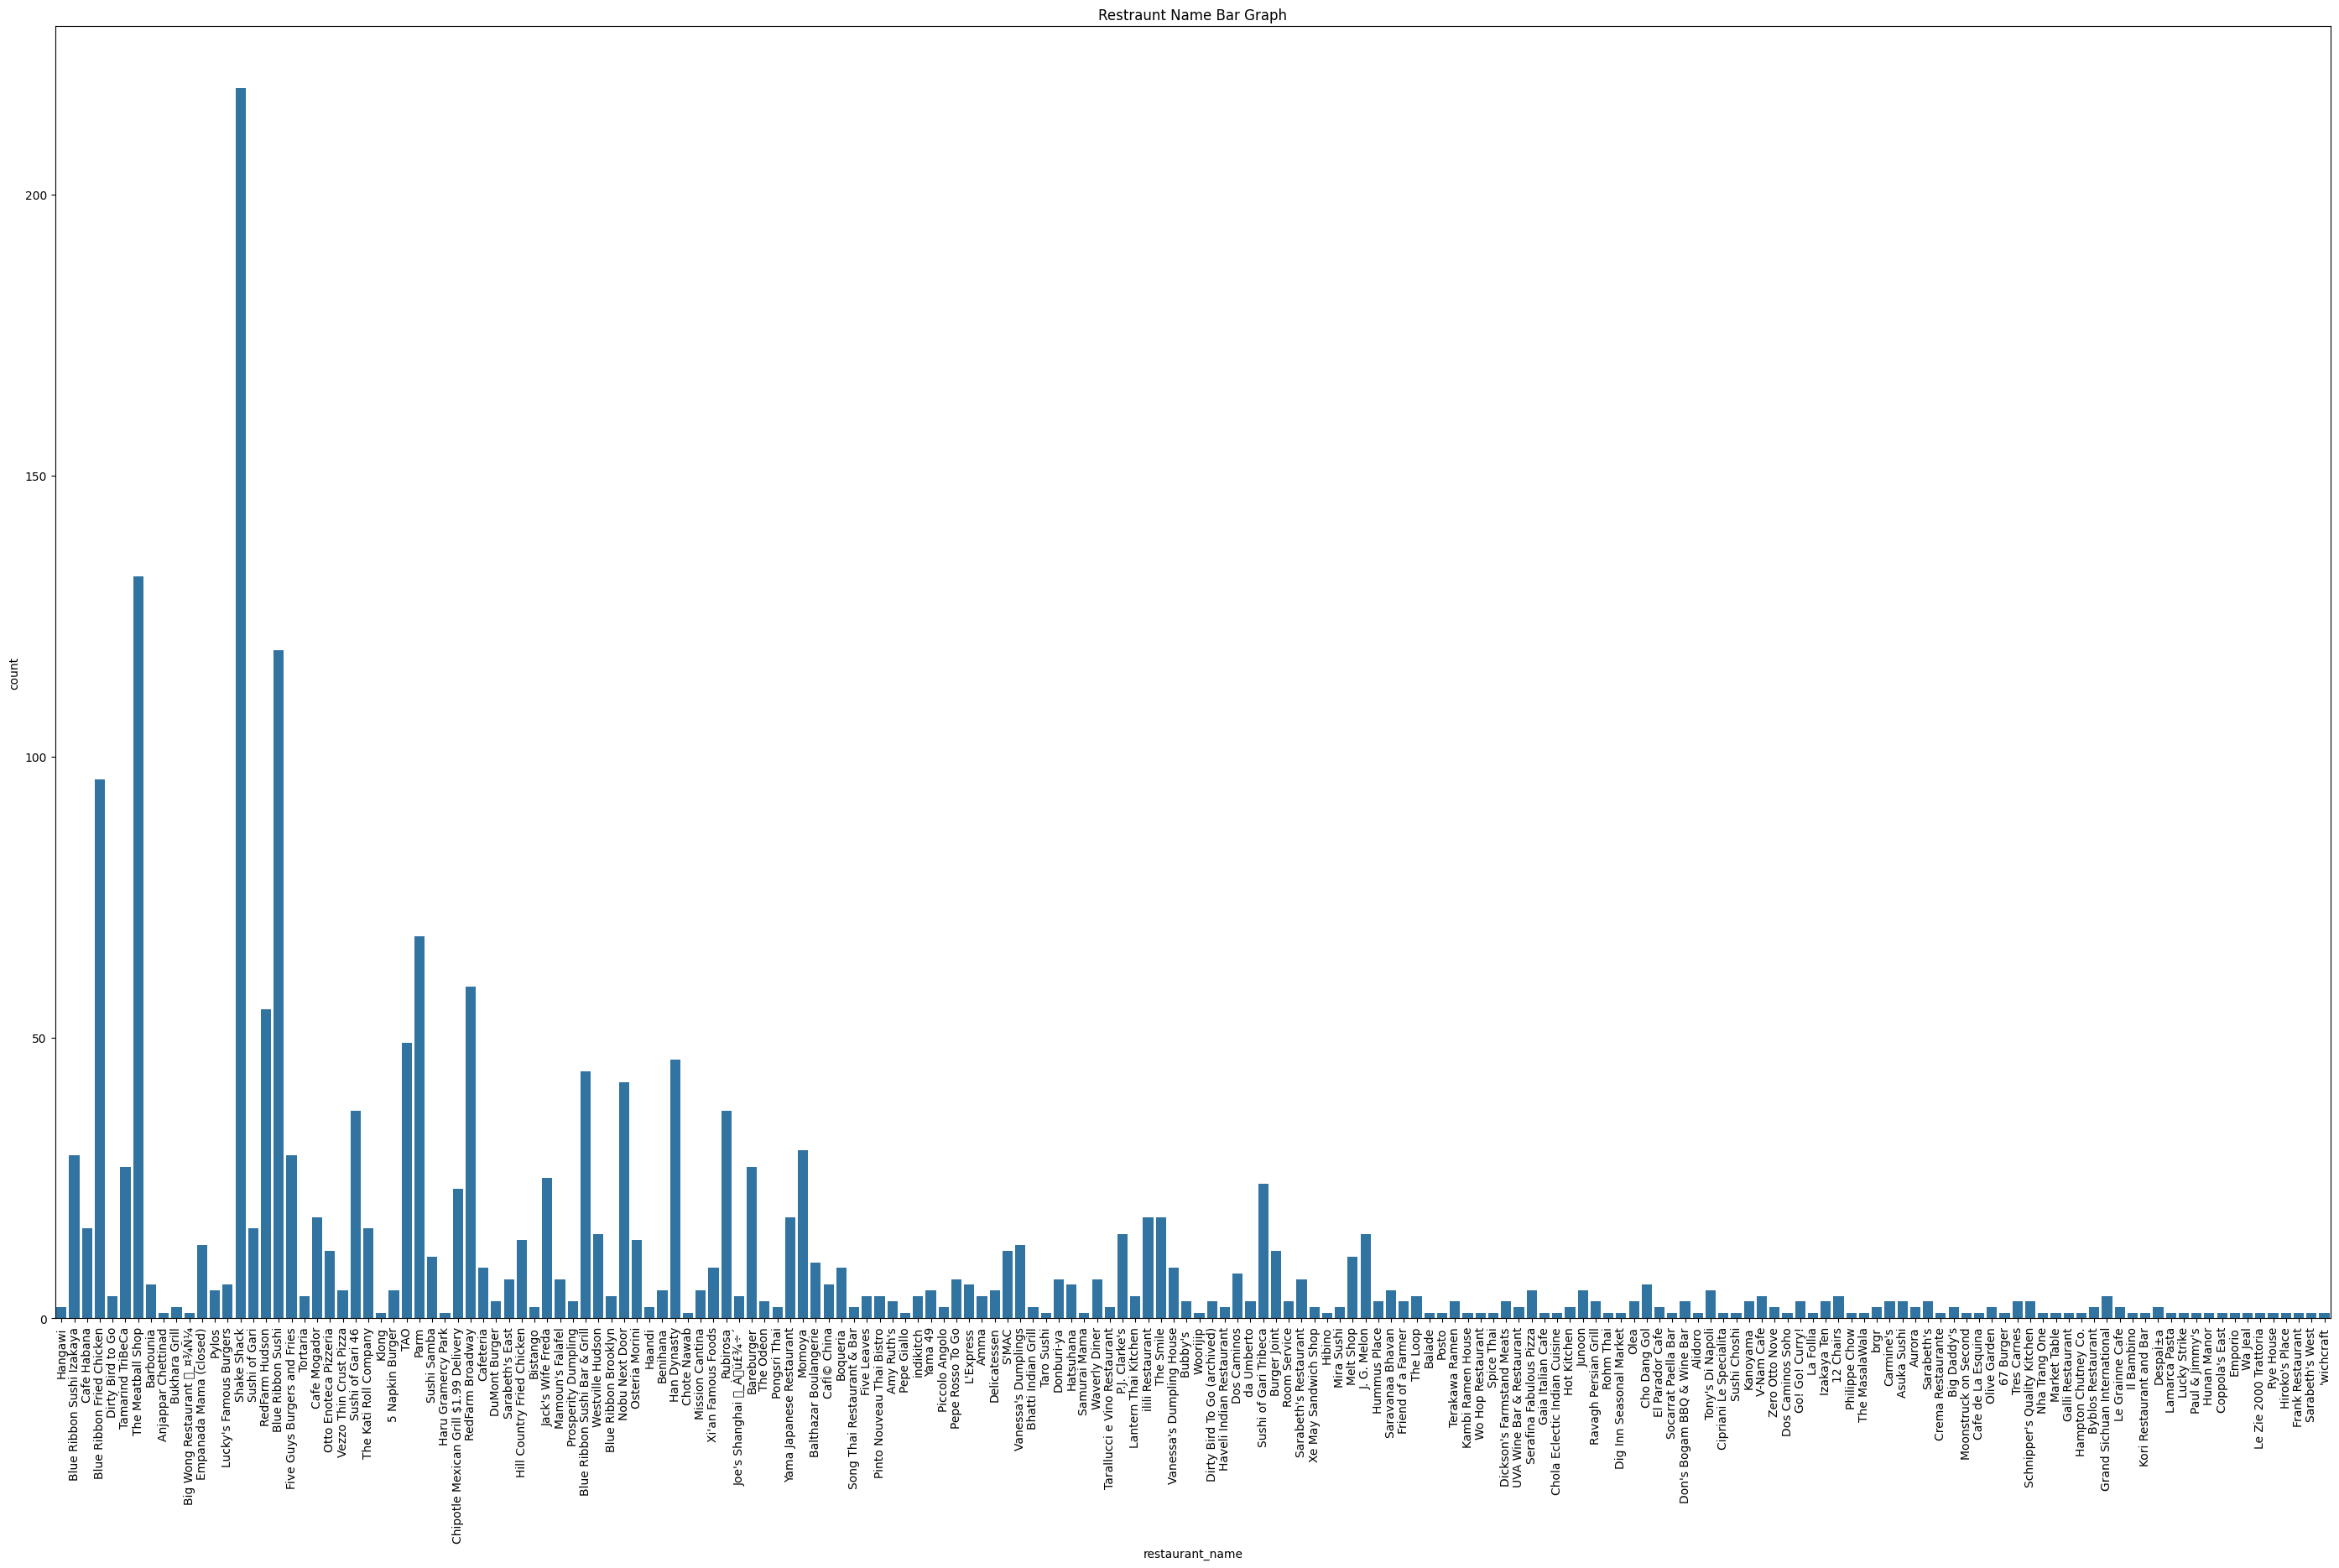

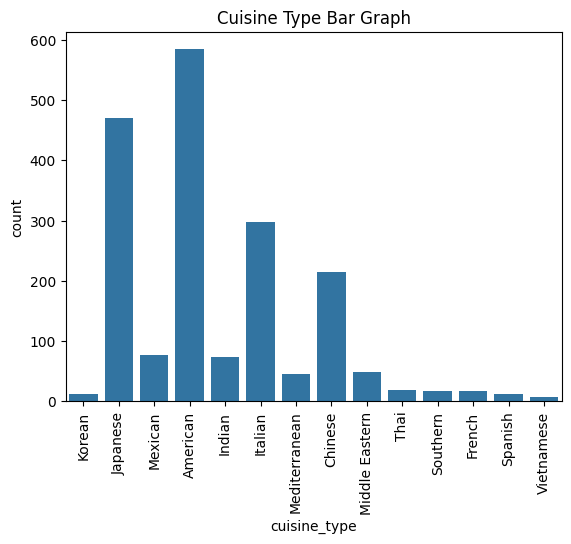

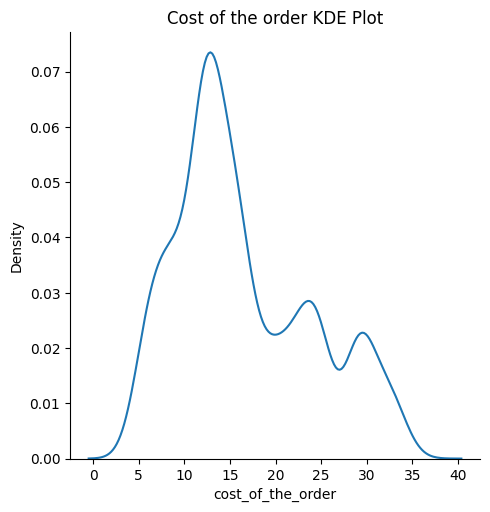

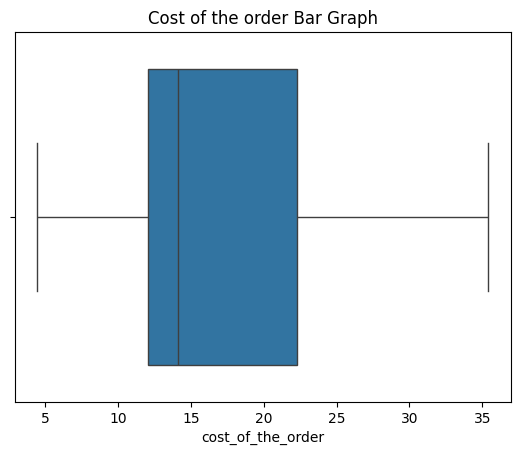

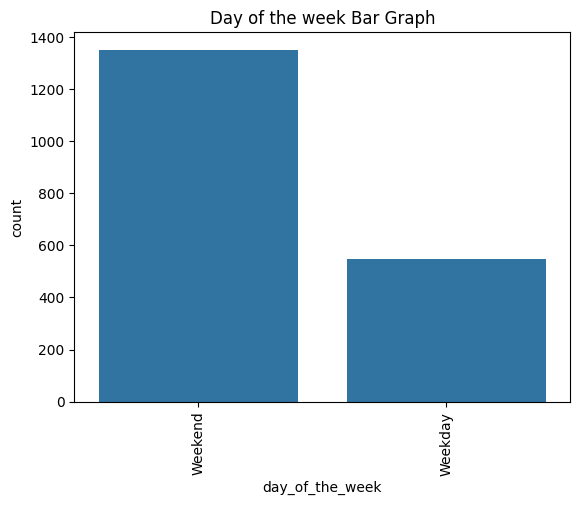

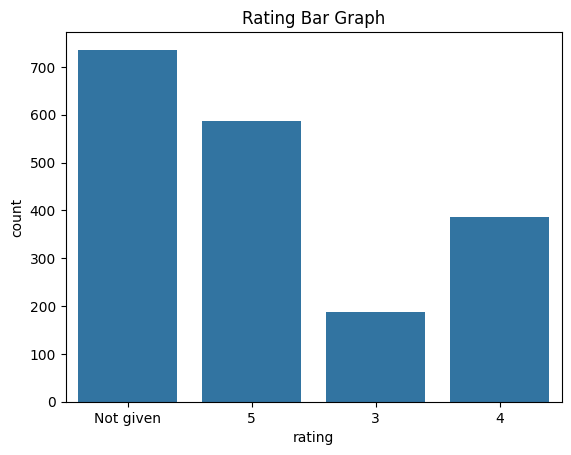

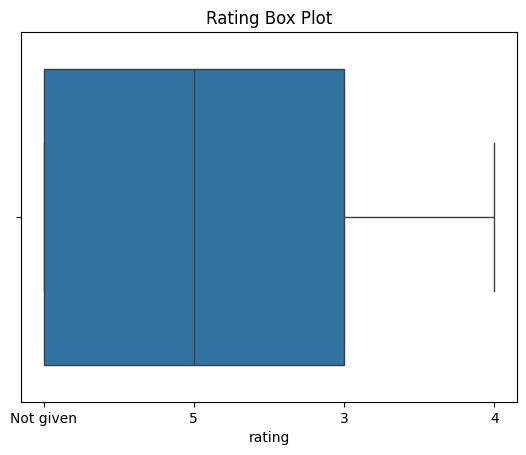

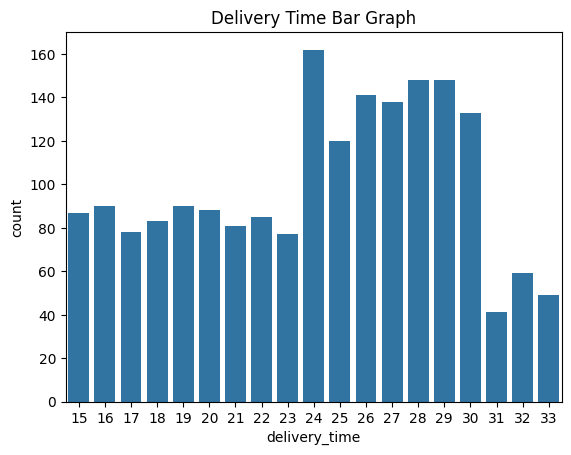

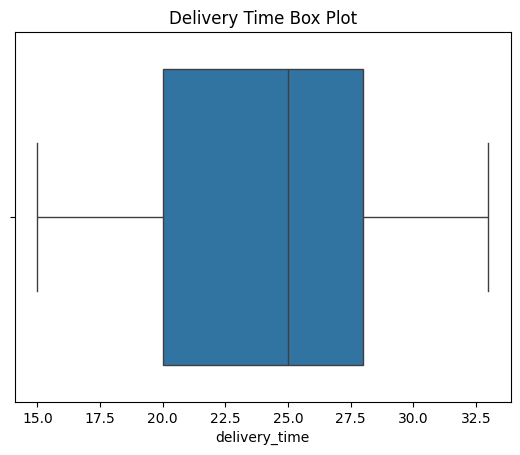

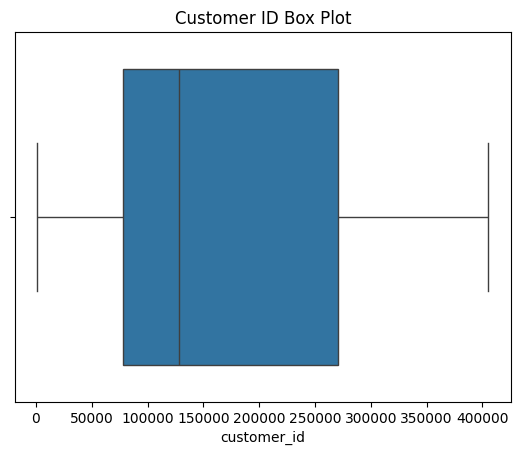

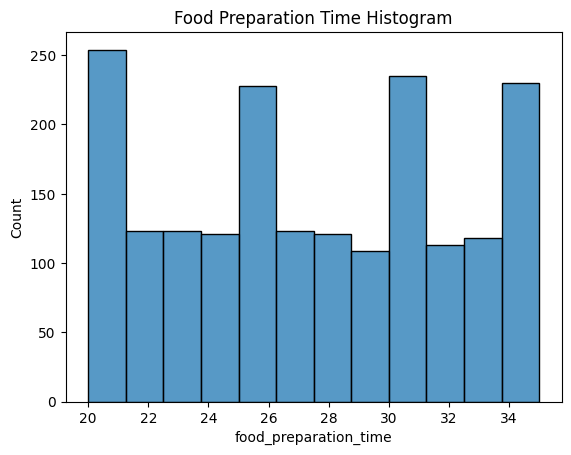

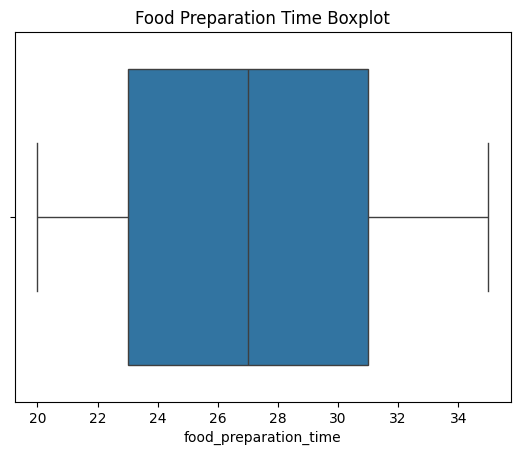

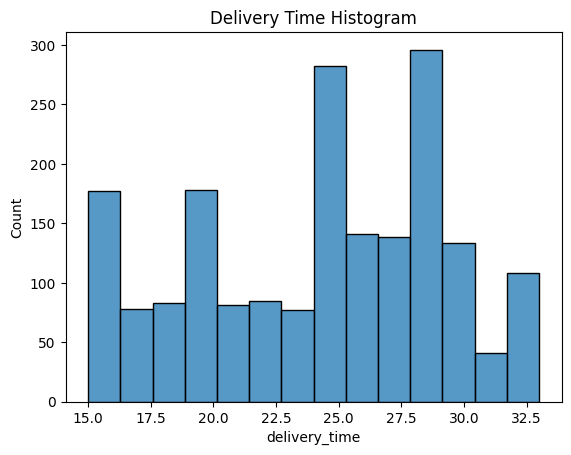

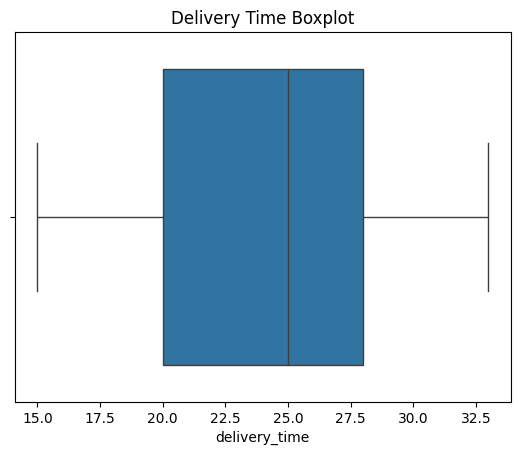

In [ ]:
# Write the code here
# the variables that are there are restraunt name, cuisine type, cost of the order, day of the week, rating, food preparation time, delivery time

# Let's check the restruant names
plt.figure(figsize=(35,20))
sns.countplot(data=data, x='restaurant_name')
plt.xticks(rotation=90)
plt.title("Restraunt Name Bar Graph")
plt.show()

# Let's check the cuisine type
sns.countplot(data=data, x='cuisine_type')
plt.xticks(rotation=90)
plt.title("Cuisine Type Bar Graph")
plt.show()

# Lets check the cost of the order
sns.displot(data=data, x='cost_of_the_order',kind='kde')
plt.title("Cost of the order KDE Plot")
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.title("Cost of the order Bar Graph")
plt.show()
# just by looking at the cost of the order there are no errors that I can forsee

# Let's check the day of the week
sns.countplot(data=data, x='day_of_the_week')
plt.xticks(rotation=90)
plt.title("Day of the week Bar Graph")
plt.show()

#Let's check the rating
sns.countplot(data=data, x = 'rating')
plt.title("Rating Bar Graph")
plt.show()

sns.boxplot(data=data, x='rating')
plt.title("Rating Box Plot")
plt.show()

# Let's check the delivery time
sns.countplot(data=data, x='delivery_time')
plt.title("Delivery Time Bar Graph")
plt.show()

sns.boxplot(data=data, x='delivery_time')
plt.title("Delivery Time Box Plot")
plt.show()

#Let's check the customer ID to see if there are any outliers that may indicate a typo
sns.boxplot(data=data, x='customer_id')
plt.title("Customer ID Box Plot")
plt.show()

#Let's check the food preparation time
sns.histplot(data=data, x='food_preparation_time')
plt.title("Food Preparation Time Histogram")
plt.show()

sns.boxplot(data=data, x = 'food_preparation_time')
plt.title("Food Preparation Time Boxplot")
plt.show()

# Let's check the delivery time
sns.histplot(data=data, x='delivery_time')
plt.title("Delivery Time Histogram")
plt.show()

sns.boxplot(data=data, x = 'delivery_time')
plt.title("Delivery Time Boxplot")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


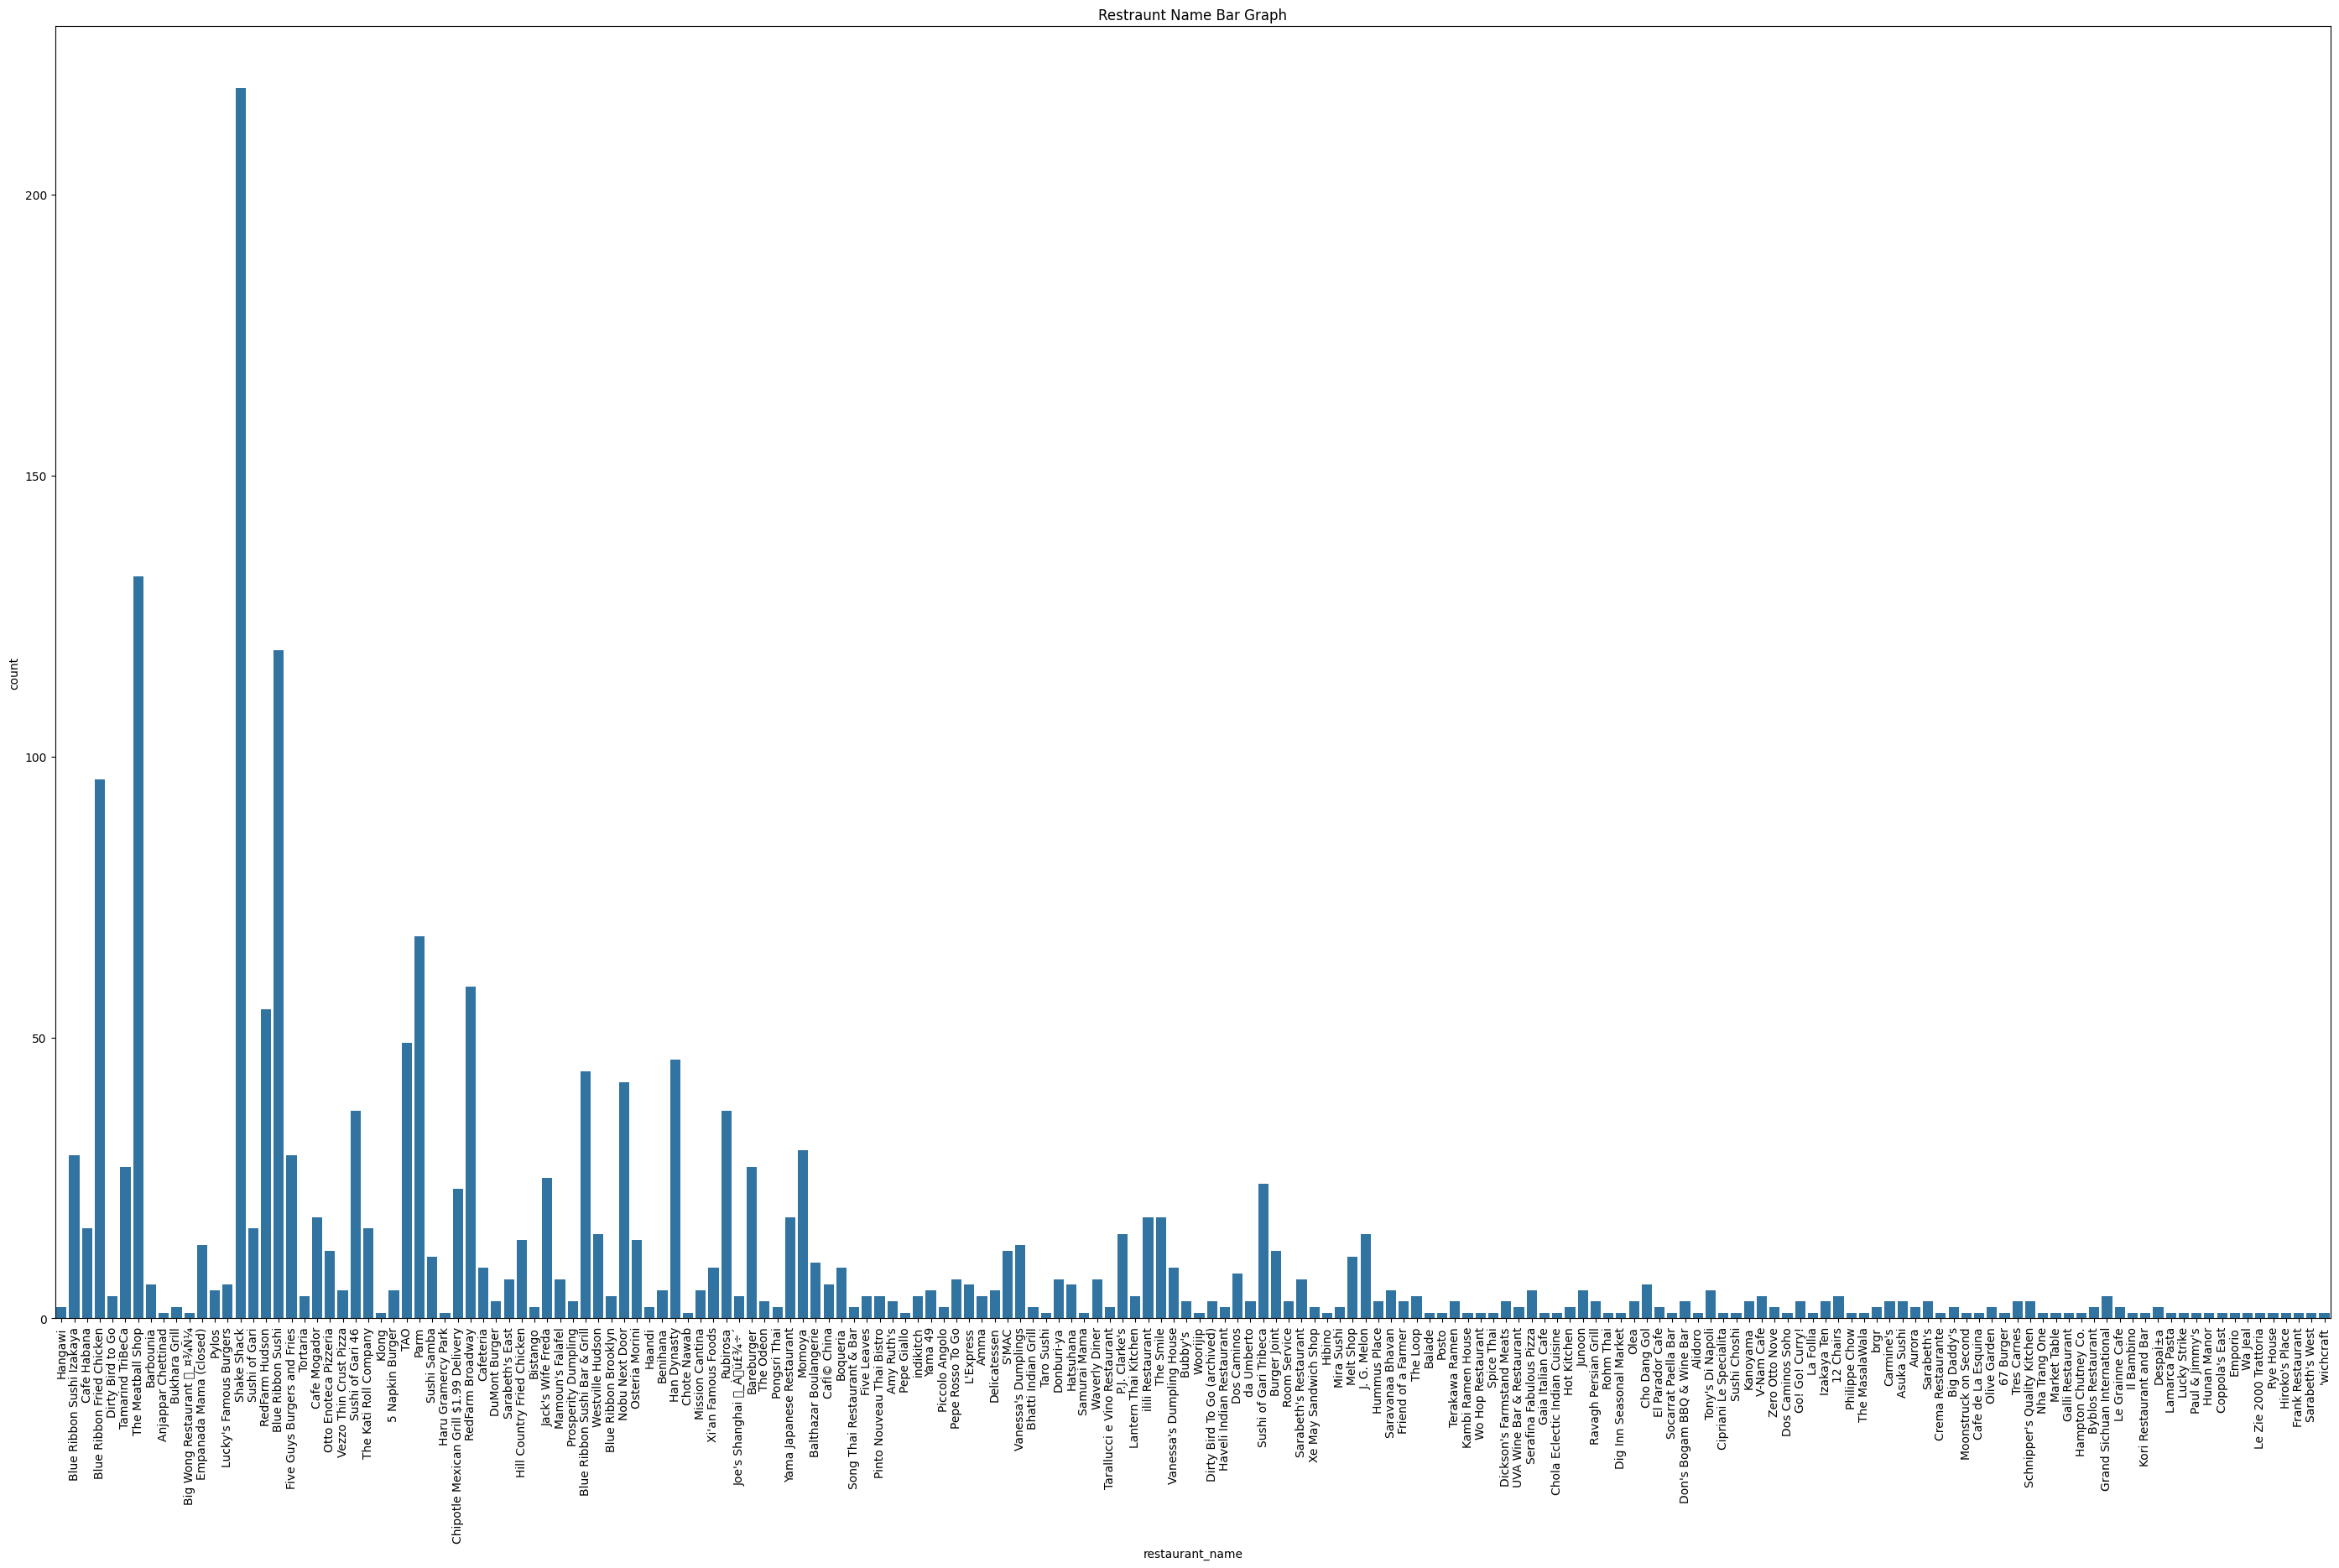

In [ ]:
#Let's check the top 5 restraunts in terms of the number of orders received
plt.figure(figsize=(35,20))
sns.countplot(data=data, x='restaurant_name')
plt.xticks(rotation=90)
plt.title("Restraunt Name Bar Graph")
plt.show()


#### Observations:


Based on the Bar graph, we know that the top 5 restraunts are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

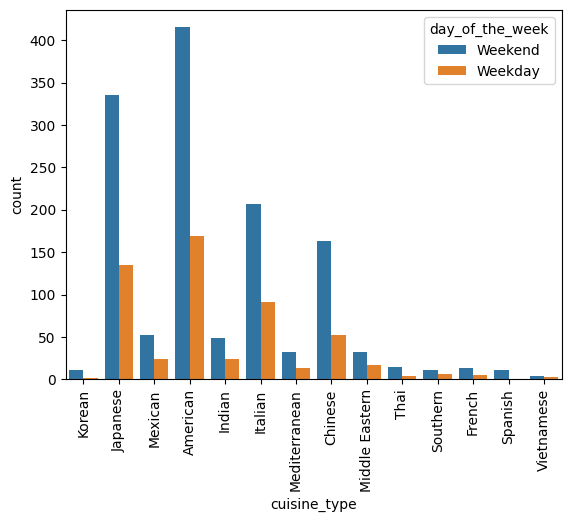

In [ ]:
# Let's check cuisine type based on days of the week ( double check if this is considered univariate)
sns.countplot(data=data, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:


The most popular cuisine on weekends is American.

In [ ]:
morethan20 = data.loc[data['cost_of_the_order']>20].shape
totalorders = data['cost_of_the_order'].shape

permorethan20 = (morethan20[0]/totalorders[0])*100
print(permorethan20)


29.24130663856691


#### Observations:


The percentage of the orders that cost more than 20 dollars is 29.24%

In [ ]:
# To figure out the mean order delivery time, we can use the describe function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


Based on the describe function, we know that the delivery time mean is 24.16 minutes.

In [ ]:
customerinfo = data['customer_id'].value_counts().head()
print(customerinfo)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


#### Observations:


The IDs of the top 3 customers are 52832, 47440, and 83287. The number of orders they placed are 13, 10 , and 9.

### Multivariate Analysis

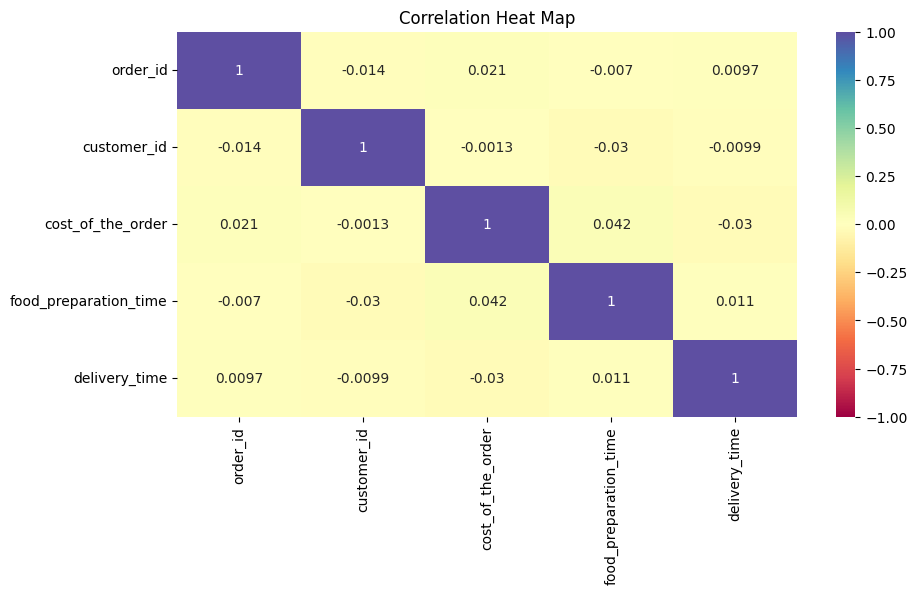

In [ ]:
# First, Let's see if any of the values have a correlation.
plt.figure(figsize=(10,5))
numdata = data.select_dtypes(include=['number'])
sns.heatmap(numdata.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title("Correlation Heat Map")
plt.show()


Based on the Heat Map, we know that there is a strong correlation between the cost of the order and food preparation time. We know that there is another strong correlation between customer_id and food_preparation_time. Let's investigate the correlation between rating and cost of the order.

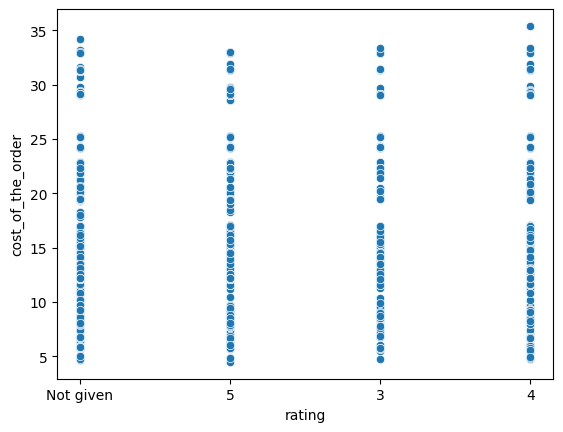

In [ ]:
# TO figure out the correlation between rating and cost of the order let's look at a scatterplot.
sns.scatterplot(data=data, x='rating', y='cost_of_the_order')
plt.show()

I assumed there would be a stronger correlation between cost and ratings but, it looks well distributed. It looks like there is no major correlation between the rating and the cost of the food. Let's investigate if there is a correlation between food prepartion time and rating.

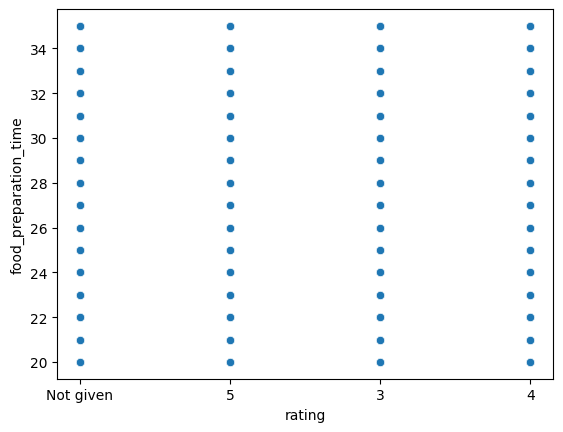

In [ ]:
# scatterplot for food preparation time and rating
sns.scatterplot(data=data, x='rating', y = 'food_preparation_time')
plt.show()

There is no strong correlation between rating and food preparation time. Let's investigate if there is a correlation between food prep time and cost.

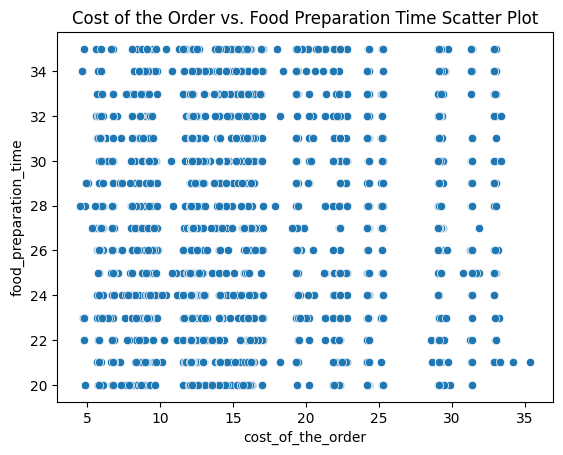

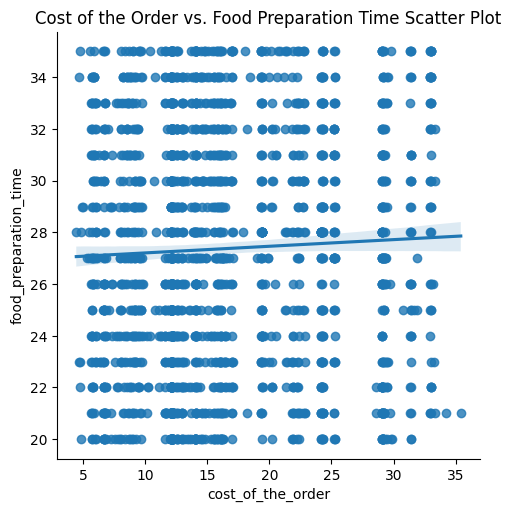

In [ ]:
# scatter plot for food preparation time and cost of the order
sns.scatterplot(data=data, x ='cost_of_the_order', y='food_preparation_time')
plt.title("Cost of the Order vs. Food Preparation Time Scatter Plot")
plt.show()

# To see the 0.042 correlation, let's look at an lmplot
sns.lmplot(data=data, x ='cost_of_the_order', y='food_preparation_time')
plt.title("Cost of the Order vs. Food Preparation Time Scatter Plot")
plt.show()

As the heat map said, there is no very strong correlation between cost of the order and food preparation time. Let's investigate rating with delivery time.

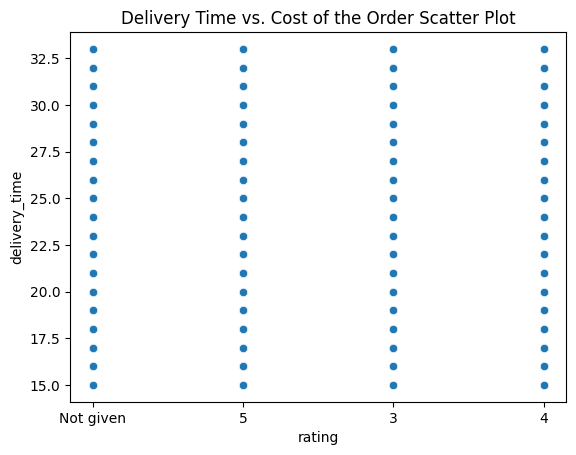

In [ ]:
# scatter plot for rating and delivery time
sns.scatterplot(data=data, x ='rating', y='delivery_time')
plt.title("Delivery Time vs. Rating")
plt.show()


There is no correlation between delivery time and rating. Let's look at the cuisine type and cost of the order.

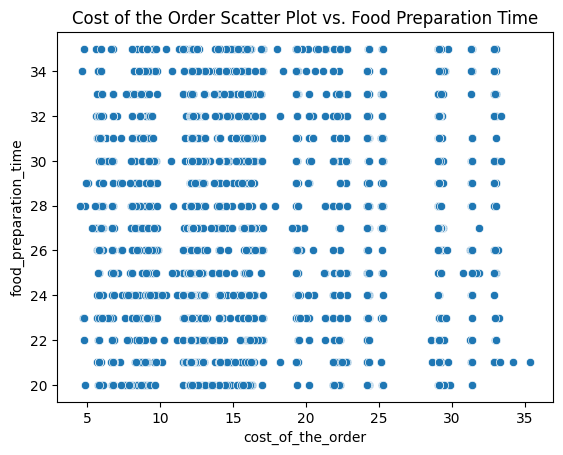

In [ ]:
# scatter plot for cost of the order and food preparation time
sns.scatterplot(data=data, x ='cost_of_the_order', y='food_preparation_time')
plt.title("Cost of the Order Scatter Plot vs. Food Preparation Time")
plt.show()

There is no correlation between food preparation time and cost of the order.

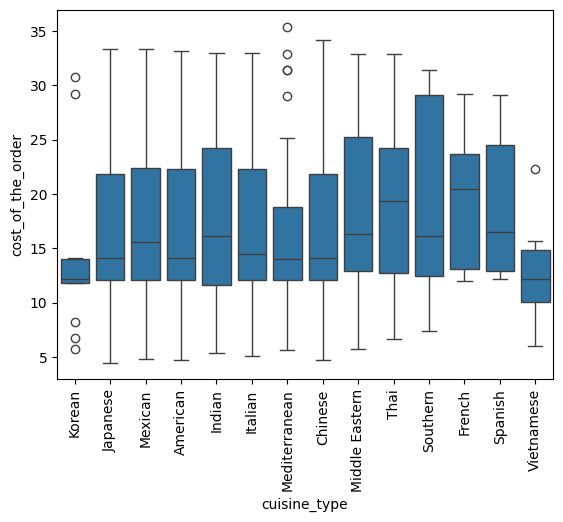

In [ ]:
sns.boxplot(data=data, x='cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

Although there are a few outliers, for cuisine type and cost of the order there it is not too out of range so we can assume that this is good.

In [ ]:
# In order to do this, first we have to remove the not given ratings.
data['rating'] = data['rating'].replace(['Not given'],np.nan)

# now the data type can become a float
data['rating'] = data['rating'].astype(float)

# Let's figure out



0       False
1       False
2        True
3       False
4       False
        ...  
1893     True
1894     True
1895    False
1896     True
1897    False
Name: rating, Length: 1898, dtype: bool


#### Observations:


In [ ]:
# To do this let's create a definition
def revenue(rownum):
  if rownum['cost_of_the_order']>20:
    return rownum['cost_of_the_order']*0.25
  elif rownum['cost_of_the_order']>5:
    return rownum['cost_of_the_order']*0.15
  else:
    return 0

#Let's apply the definition from row = 1
data['netRevenue'] = data.apply(revenue, axis=1)

# Let's calculate the sum of the net Revenue to get the total across all orders
netRevenue = data['netRevenue'].sum()
print(netRevenue)


6166.303


#### Observations:


The net Revenue is $6166.30.

In [ ]:
# Write the code here
# create a column with the total time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

#lets find the length of the total time that is above 60 minutes
ordersabove60min = len(data[data['total_time'] > 60])

#lets find the total orders
total = len(data)

#percent
percent = ordersabove60min/total * 100
print(percent)

10.537407797681771


#### Observations:


The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.53%.

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
avgtimeweekdays = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
avgtimeweekends = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(avgtimeweekdays)
print(avgtimeweekends)

28.340036563071298
22.4700222057735


#### Observations:


The average time during weekdays is 28.34 minutes.
The average time during weekends is 22.47 minutes

### Conclusion and Recommendations

### Conclusions:
* Overall, I think this data set was well put together. I don't think there were a lot of error in terms of the data itself. The data was quite clean so, it was easy to work with.
* My conclusions from the analysis are that there is not a lot of correlation between ratings and the cost of the order or food preparation time. There is not a strong correlation from cost of the order vs. food preparation time. There is not a strong correlation between delivery time and cost of the order. There is not a strong correlation between cuisine type and cost of the order. There is not a strong correlation between food preparation time and cost of the order. These surprised me as I thought there would a strong correlation between ratings and time or ratings and cost however, there was not. This was also surprising as I thought the higher the cost, the more costly it would be.

### Recommendations:

*  To improve the business I would use the correlation between food preparation time and cost of the order and try to increase the correlation in a negative slope. Currently, when we graphed the correlation we learned that the food preparation time and the cost of the order have a positive slope meaning that the higher the food prep time, the higher the cost. To increase efficiency, I would try to make the food prep time lower, with the higher cost.
* I would also hire wore drivers for the weekdays, as most of the orders are happening in the weekdays rather than the weekends.

In [ ]:
!jupyter nbconvert --to html Learner_Notebook_Full_Code-2.ipynb

[NbConvertApp] Converting notebook Learner_Notebook_Full_Code-2.ipynb to html
[NbConvertApp] Writing 2316896 bytes to Learner_Notebook_Full_Code-2.html


---